In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
titanic=sns.load_dataset("titanic")

In [33]:
titanic.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,Not Survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Survive,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Survive,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Survive,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,Not Survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   Gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [25]:
titanic.rename(columns={"sex":"Gender"},inplace=True)

In [26]:
titanic['age']=pd.to_numeric(titanic["age"])


In [27]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

## -1. What is the averall survival rate of passengers on the Titanic?

In [10]:
survival=titanic["alive"].value_counts()
survival

no     549
yes    342
Name: alive, dtype: int64

Text(0.5, 1.0, 'Suvival Rate of Passengers')

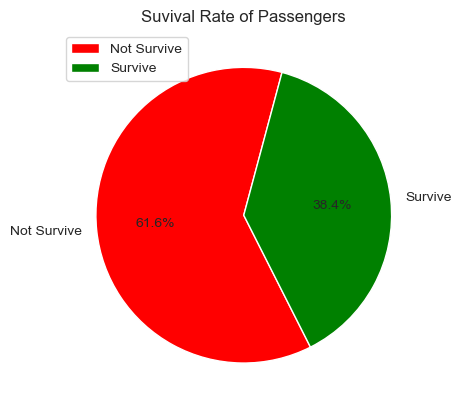

In [11]:

survival=titanic["alive"].value_counts()
survival
sns.set_style("whitegrid")
my_palette=["red","green"]
sns.set_palette(my_palette)
plt.pie(survival.values,labels=["Not Survive","Survive"],autopct='%1.1f%%', startangle=75 )
plt.legend()
plt.title("Suvival Rate of Passengers")


In [12]:
titanic["alive"].value_counts()

no     549
yes    342
Name: alive, dtype: int64

## 2- What was the gender ditribution among the passengers on the titanic?

TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

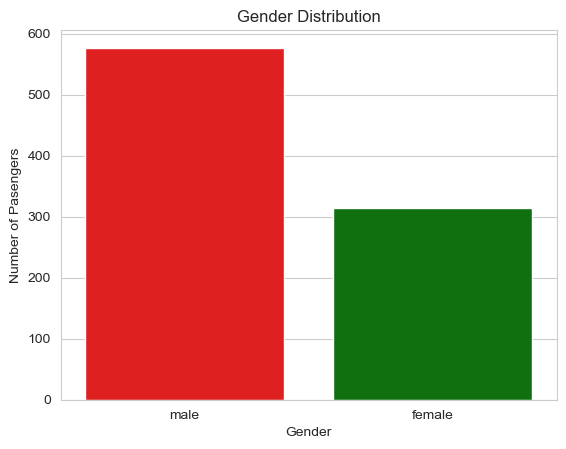

In [13]:
ax=sns.countplot(x="Gender",data=titanic)
ax.set(title="Gender Distribution",xlabel="Gender",ylabel="Number of Pasengers",)
    
for p in ax.patches:   
    height =int( p.get_height())
#     ax.annotate(f"{height}", xy=(p.get_x() + p.get_width()/2, height), xytext=(0,3),
#                 textcoords="offset points", ha="center", va="bottom", fontsize=12)
    ax.text()



## 3- Did the survival rate differ by gender? if so how much?

In [17]:
survival.head()

no     549
yes    342
Name: alive, dtype: int64

In [32]:
titanic["survived"] = titanic["survived"].apply(lambda x: "Survive" if x==1  else " Not Survive")


In [22]:
titanic["survived"].value_counts()

Survive    891
Name: survived, dtype: int64

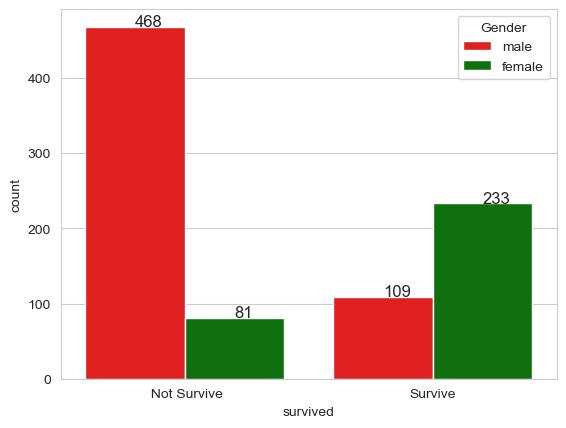

In [34]:
ax=sns.countplot(x="survived",hue="Gender",data=titanic)
for p in ax.patches:
    height=int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,f'{height}',fontsize=12)

 ## 4- What was the age distribution among the passengers on the Titanic?

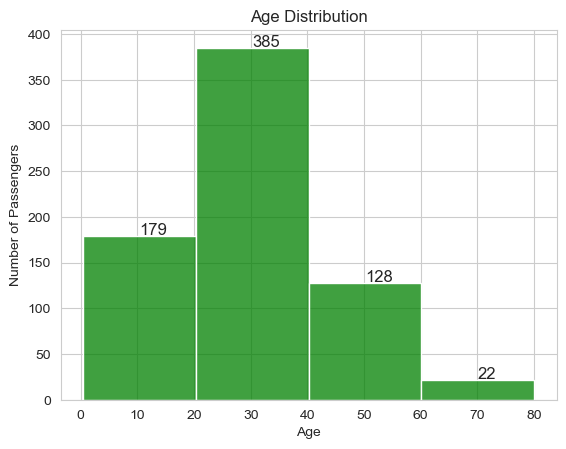

In [21]:
ax=sns.histplot(data=titanic,x="age",bins=4,edgecolor="white",color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
for p in ax.patches:
    height=int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,f'{height}',fontsize=12)

 ## 5- Did the survival rate differ by the journey class?if so , how much

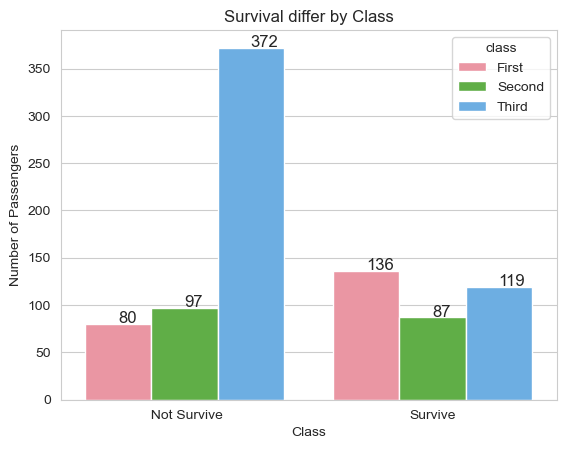

In [37]:
ax=sns.countplot(x=titanic[titanic.survived=="Survive"].survived,hue=titanic["class"])
plt.title("Survival differ by Class")
plt.xlabel("Class")
plt.ylabel("Number of Passengers")
for p in ax.patches:
    height=int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,f'{height}',fontsize=12)

In [39]:
print(titanic[titanic.survived=="Survive"])

    survived  pclass  Gender   age  sibsp  parch     fare embarked   class  \
1    Survive       1  female  38.0      1      0  71.2833        C   First   
2    Survive       3  female  26.0      0      0   7.9250        S   Third   
3    Survive       1  female  35.0      1      0  53.1000        S   First   
8    Survive       3  female  27.0      0      2  11.1333        S   Third   
9    Survive       2  female  14.0      1      0  30.0708        C  Second   
..       ...     ...     ...   ...    ...    ...      ...      ...     ...   
875  Survive       3  female  15.0      0      0   7.2250        C   Third   
879  Survive       1  female  56.0      0      1  83.1583        C   First   
880  Survive       2  female  25.0      0      1  26.0000        S  Second   
887  Survive       1  female  19.0      0      0  30.0000        S   First   
889  Survive       1    male  26.0      0      0  30.0000        C   First   

       who  adult_male deck  embark_town alive  alone  
1    wo